In [43]:
import pandas as pd
import random
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('Total Compute Nodes-data-2024-04-25 03_42_44.csv')
df

,Time,totalComputeNodes
0,4/17/2024 0:00,10
1,4/17/2024 0:05,10
2,4/17/2024 0:10,6
3,4/17/2024 0:15,6
4,4/17/2024 0:20,6
...,...,...
2256,4/24/2024 23:35,6
2257,4/24/2024 23:40,6
2258,4/24/2024 23:45,6
2259,4/24/2024 23:50,6


In [45]:
df.dtypes

Time                 object
totalComputeNodes     int64
dtype: object

In [46]:
def getDay(x):
    return x.split('/')[1]

df['Day'] = df['Time'].apply(getDay)
df

,Time,totalComputeNodes,Day
0,4/17/2024 0:00,10,17
1,4/17/2024 0:05,10,17
2,4/17/2024 0:10,6,17
3,4/17/2024 0:15,6,17
4,4/17/2024 0:20,6,17
...,...,...,...
2256,4/24/2024 23:35,6,24
2257,4/24/2024 23:40,6,24
2258,4/24/2024 23:45,6,24
2259,4/24/2024 23:50,6,24


In [47]:
df = df.groupby(['Day','totalComputeNodes']).count()
df.reset_index(inplace=True)
df.columns = ['Day' , 'totalNodeRunning' , 'Count']
df

,Day,totalNodeRunning,Count
0,17,6,132
1,17,10,92
2,17,11,2
3,17,12,39
4,17,15,1
5,17,16,22
6,18,6,132
7,18,10,56
8,18,12,45
9,18,16,12


In [48]:
df_tmp = df.groupby('Day').sum().reset_index()
df_tmp

,Day,totalNodeRunning,Count
0,17,70,288
1,18,44,245
2,19,51,288
3,20,16,288
4,21,24,288
5,22,58,288
6,23,44,288
7,24,44,288


In [49]:
df_tmp = df_tmp.drop(columns=['totalNodeRunning'])
df_tmp

,Day,Count
0,17,288
1,18,245
2,19,288
3,20,288
4,21,288
5,22,288
6,23,288
7,24,288


In [50]:
df_tmp.columns = ['Day' , 'Sum']
df_tmp

,Day,Sum
0,17,288
1,18,245
2,19,288
3,20,288
4,21,288
5,22,288
6,23,288
7,24,288


In [51]:
list_compare = list(df_tmp.values)
list_compare

[array(['17', 288], dtype=object),
 array(['18', 245], dtype=object),
 array(['19', 288], dtype=object),
 array(['20', 288], dtype=object),
 array(['21', 288], dtype=object),
 array(['22', 288], dtype=object),
 array(['23', 288], dtype=object),
 array(['24', 288], dtype=object)]

In [52]:
def calculatePercent(x):
    total = [ i[1] for i in list_compare if i[0] == x[0]]
    return round(int(x[2]) / int(total[0]) * 100)
df['Percent'] = df.apply(calculatePercent, axis=1)
df

C:\Users\khangnguyen1\AppData\Local\Temp\ipykernel_48480\1522738477.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = [ i[1] for i in list_compare if i[0] == x[0]]
C:\Users\khangnguyen1\AppData\Local\Temp\ipykernel_48480\1522738477.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return round(int(x[2]) / int(total[0]) * 100)


,Day,totalNodeRunning,Count,Percent
0,17,6,132,46
1,17,10,92,32
2,17,11,2,1
3,17,12,39,14
4,17,15,1,0
5,17,16,22,8
6,18,6,132,54
7,18,10,56,23
8,18,12,45,18
9,18,16,12,5


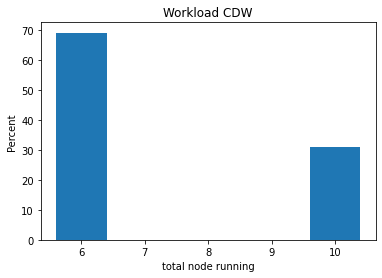

In [53]:
plt.bar(df[df['Day'] == '20']['totalNodeRunning'] , df[df['Day'] == '20']['Percent'])

plt.xlabel('total node running' )
plt.ylabel('Percent')
plt.title('Workload CDW')

plt.show()

In [54]:
df

,Day,totalNodeRunning,Count,Percent
0,17,6,132,46
1,17,10,92,32
2,17,11,2,1
3,17,12,39,14
4,17,15,1,0
5,17,16,22,8
6,18,6,132,54
7,18,10,56,23
8,18,12,45,18
9,18,16,12,5


In [55]:
df['VW'] = df['totalNodeRunning'].apply(lambda x : 'User' if int(x) > 10 else 'Job' )
df

,Day,totalNodeRunning,Count,Percent,VW
0,17,6,132,46,Job
1,17,10,92,32,Job
2,17,11,2,1,User
3,17,12,39,14,User
4,17,15,1,0,User
5,17,16,22,8,User
6,18,6,132,54,Job
7,18,10,56,23,Job
8,18,12,45,18,User
9,18,16,12,5,User


In [19]:
df.to_csv('workload-cdw-new.csv')

In [56]:
df.pivot_table('Percent', ['Day'], 'totalNodeRunning')

totalNodeRunning,6,7,8,10,11,12,14,15,16
Day,,,,,,,,,
17,46.0,NaN,NaN,32.0,1.0,14.0,NaN,0.0,8.0
18,54.0,NaN,NaN,23.0,NaN,18.0,NaN,NaN,5.0
19,61.0,0.0,NaN,26.0,NaN,10.0,NaN,NaN,2.0
20,69.0,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN
21,76.0,NaN,0.0,24.0,NaN,NaN,NaN,NaN,NaN
22,41.0,NaN,NaN,24.0,NaN,18.0,1.0,NaN,16.0
23,41.0,NaN,NaN,19.0,NaN,32.0,NaN,NaN,8.0
24,49.0,NaN,NaN,28.0,NaN,19.0,NaN,NaN,3.0


In [57]:
df.pivot_table('Percent', ['Day'], 'totalNodeRunning').to_csv('workload-cdw.csv')